<a href="https://colab.research.google.com/github/Sudharsan0001/Customer_Segmentation/blob/main/Customer_Behaviour_RFM_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Summary**

In this project, we delve into a comprehensive analysis of customer transactions within our business. The primary objectives encompass the following key steps:

**Data Cleaning:**
We initiate the project by cleaning the dataset, ensuring data integrity and preparing a robust foundation for subsequent analyses.

**RFM Analysis:**
Employing the RFM (Recency, Frequency, Monetary) framework, we aim to gain insights into customer behavior and value. The resulting RFM table will serve as a fundamental tool for segmentation and personalized marketing strategies.

**Customer Segmentation:**
Utilizing k-means clustering, we categorize customers based on recency, frequency, and monetary parameters. This enables us to identify distinct customer segments with unique characteristics.

**Cluster Profiling:**
We conduct a thorough analysis of each customer cluster, defining their specific attributes and behaviors. This profiling lays the groundwork for targeted marketing strategies tailored to the preferences and needs of each segment.

**Marketing Strategies:**
Leveraging the insights from cluster profiling, we formulate effective marketing strategies aimed at maximizing engagement, satisfaction, and retention within each identified customer segment.

**Returns Analysis:**
As a supplementary exploration, we delve into product returns data to understand patterns behind returns.

In [ ]:
import numpy as np
from datetime import datetime
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("online_retail_data.csv")

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,561034,21908,CHOCOLATE THIS WAY METAL SIGN,2,24/07/11 11:45,2.10,15506.0,United Kingdom
1,574690,23508,MINI PLAYING CARDS DOLLY GIRL,20,06/11/11 13:11,0.42,12638.0,Sweden
2,572294,22567,20 DOLLY PEGS RETROSPOT,1,23/10/11 13:10,1.45,13471.0,United Kingdom
3,548894,37446,MINI CAKE STAND WITH HANGING CAKES,1,04/04/11 16:01,3.29,NaN,United Kingdom
4,552687,21625,VINTAGE UNION JACK APRON,1,10/05/11 15:09,14.13,NaN,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    50000 non-null  object 
 1   StockCode    50000 non-null  object 
 2   Description  49855 non-null  object 
 3   Quantity     50000 non-null  int64  
 4   InvoiceDate  50000 non-null  object 
 5   UnitPrice    50000 non-null  float64
 6   CustomerID   37534 non-null  float64
 7   Country      50000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.1+ MB


*   There are 50,000 rows and 8 columns in our dataset.
*   Invoice number is unique to each transaction.
*   Customer Id is an unique identifier for each customer.
*   We have null values in the product description field and more importantly in the customer Id field.
*   Data type of the InvoiceDate should be changed to date time. We should also change the data type of customer Id column.





# Data Preprocessing

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d/%m/%y %H:%M')

In [ ]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
59,C564945,20685,DOORMAT RED RETROSPOT,-10,2011-08-31 13:26:00,6.75,16652.0,United Kingdom
77,C565050,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,-2,2011-08-31 17:10:00,4.95,12381.0,Norway
122,544396,62094B,NaN,-92,2011-02-18 12:16:00,0.00,NaN,United Kingdom
241,C539258,21258,VICTORIAN SEWING BOX LARGE,-2,2010-12-16 14:30:00,10.95,16233.0,United Kingdom
272,C560540,23291,DOLLY GIRL CHILDRENS CUP,-1,2011-07-19 12:26:00,1.25,12415.0,Australia
...,...,...,...,...,...,...,...,...
49752,C539576,15056BL,EDWARDIAN PARASOL BLACK,-6,2010-12-20 12:25:00,5.95,14911.0,EIRE
49866,C573864,23168,CLASSIC CAFE SUGAR DISPENSER,-2,2011-11-01 11:55:00,1.04,15311.0,United Kingdom
49893,C569636,22994,TRAVEL CARD WALLET RETROSPOT,-1,2011-10-05 12:14:00,0.42,12841.0,United Kingdom
49909,C560855,23193,BUFFALO BILL TREASURE BOOK BOX,-2,2011-07-21 13:00:00,2.25,14410.0,United Kingdom


Negative quantity indicates that the product was returned. We can remove these records from our dataset as our aim is to build a RFM table based on this transaction data.

In [ ]:
data2 = data[data['Quantity']>0]

In [ ]:
data2['Total_Value'] = data2['Quantity']*data2['UnitPrice']

<ipython-input-8-b03567db6b04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Total_Value'] = data2['Quantity']*data2['UnitPrice']


In [ ]:
data2 = data2.dropna(subset=['CustomerID'])

As our aim is to do customer segmentation, We can remove those records where we don't have a customer Id which acts as the unique identifier of a customer.

In [ ]:
data2.shape

(36689, 9)

In [ ]:
data2['CustomerID'] = data2['CustomerID'].astype(int)

In [ ]:
data2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Value
0,561034,21908,CHOCOLATE THIS WAY METAL SIGN,2,2011-07-24 11:45:00,2.10,15506,United Kingdom,4.20
1,574690,23508,MINI PLAYING CARDS DOLLY GIRL,20,2011-11-06 13:11:00,0.42,12638,Sweden,8.40
2,572294,22567,20 DOLLY PEGS RETROSPOT,1,2011-10-23 13:10:00,1.45,13471,United Kingdom,1.45
5,554986,21175,GIN + TONIC DIET METAL SIGN,2,2011-05-29 12:35:00,2.55,14451,United Kingdom,5.10
6,554141,22219,LOVEBIRD HANGING DECORATION WHITE,12,2011-05-23 10:34:00,0.85,14189,United Kingdom,10.20


In [ ]:
ref_date = data2['InvoiceDate'].max()+pd.Timedelta(days=1)

In [ ]:
rfm_data = data2.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,
    'InvoiceNo':'count',
    'Total_Value':'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'Total_Value': 'Monetary'})

In [ ]:
rfm_data

,Recency,Frequency,Monetary
CustomerID,,,
12347,2,17,262.58
12348,75,2,224.40
12349,19,3,60.00
12350,310,2,40.20
12352,36,9,174.53
...,...,...,...
18278,74,2,32.00
18280,278,1,23.60
18282,8,3,52.17


In [ ]:
scaler = StandardScaler()

In [ ]:
rfm_scaled = scaler.fit_transform(rfm_data[['Recency','Frequency','Monetary']])

In [ ]:
rfm_scaled

array([[-0.94092909,  0.30943513,  0.07016665],
       [-0.21771389, -0.34726565,  0.02078528],
       [-0.77250912, -0.30348559, -0.19184691],
       ...,
       [-0.88148675, -0.30348559, -0.2019741 ],
       [-0.92111498,  2.41087761, -0.02039604],
       [-0.37622681, -0.17214544, -0.05053186]])

In [ ]:
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=25,random_state=2)
  km.fit(rfm_scaled)
  wcss.append(km.inertia_)


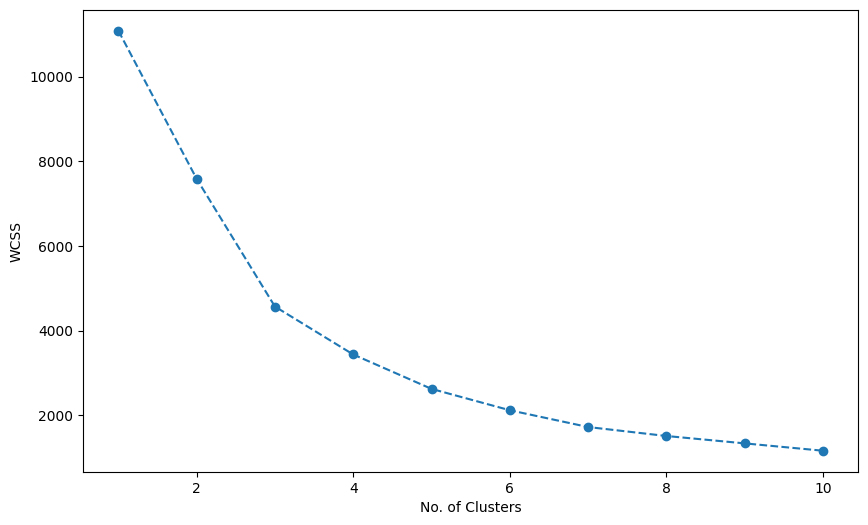

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
sil = []
for i in range(2, 11):
    kmeans = km = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=25,random_state=3)
    cluster_labels = kmeans.fit_predict(rfm_scaled)
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    sil.append(silhouette_avg)

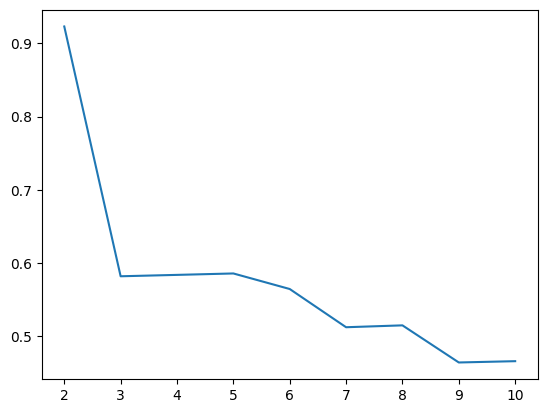

In [ ]:
plt.plot(range(2,11),sil)

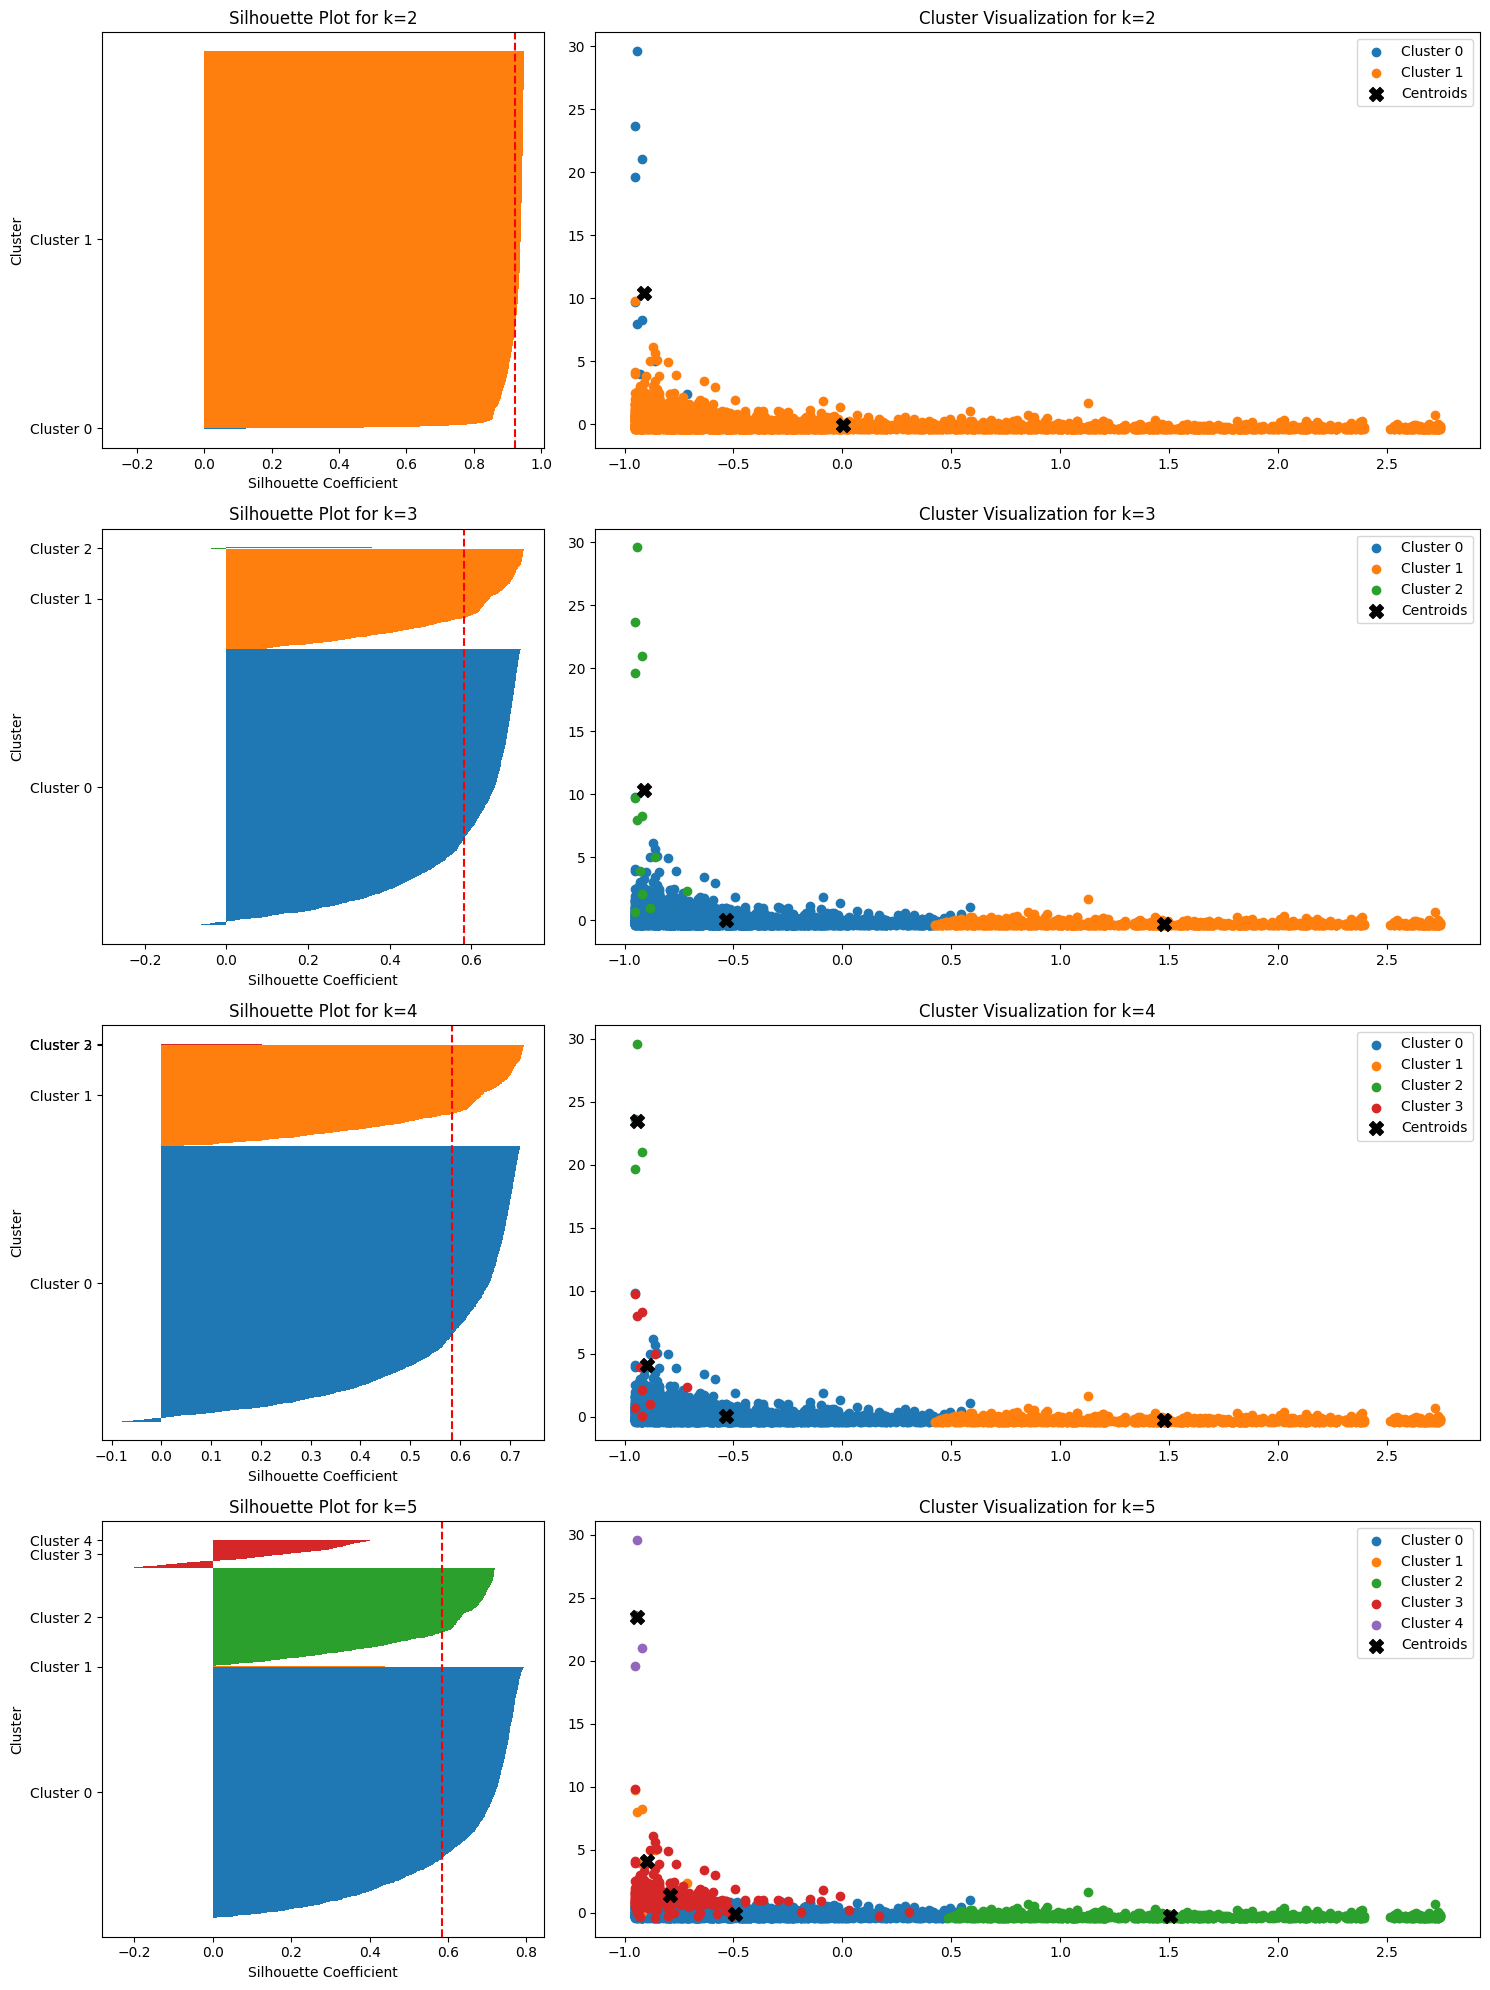

In [ ]:
import matplotlib.gridspec as gridspec
from sklearn.metrics import silhouette_samples
import numpy as np


fig = plt.figure(figsize=(15, 20))
gs = gridspec.GridSpec(4, 2, width_ratios=[1, 2])

for i, k in enumerate([2, 3, 4, 5]):
    kmeans = KMeans(n_init=25, n_clusters=k, init='k-means++', max_iter=300, random_state=10)
    cluster_labels = kmeans.fit_predict(rfm_scaled)


    silhouette_vals = silhouette_samples(rfm_scaled, cluster_labels)
    avg_score = silhouette_score(rfm_scaled, cluster_labels)


    ax1 = plt.subplot(gs[i, 0])
    y_lower, y_upper = 0, 0
    yticks = []
    for j, cluster in enumerate(np.unique(cluster_labels)):
        cluster_silhouette_vals = silhouette_vals[cluster_labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        yticks.append((y_lower + y_upper) / 2)
        y_lower += len(cluster_silhouette_vals)
    ax1.axvline(avg_score, color="red", linestyle="--")
    ax1.set_yticks(yticks)
    ax1.set_yticklabels([f'Cluster {x}' for x in np.unique(cluster_labels)])
    ax1.set_ylabel('Cluster')
    ax1.set_xlabel('Silhouette Coefficient')
    ax1.set_title(f'Silhouette Plot for k={k}')


    ax2 = plt.subplot(gs[i, 1])
    for j in np.unique(cluster_labels):
        ax2.scatter(rfm_scaled[cluster_labels == j, 0], rfm_scaled[cluster_labels == j, 1], label=f'Cluster {j}')
    ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', marker='X', label='Centroids')
    ax2.set_title(f'Cluster Visualization for k={k}')
    ax2.legend()

plt.tight_layout()
plt.show()


From the above plot, number of clusters K=2,3 seems to be better options, both of them have very similar average silhouette scores as well but looking at the silhouette plot for K=3, We have datapoints in both cluster 0 and cluster 2 that have negative Silhouette scores.When we look at the scatterplot for k=3, the datapoints in cluster 2 have lot of variance so the cluster is not internally cohesive. So K=4 seems to be the better option.

In [ ]:
km = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=25,random_state=2)
clusters=km.fit_predict(rfm_scaled)
rfm_data['Cluster'] = clusters

In [ ]:
rfm_data

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12347,2,17,262.58,1
12348,75,2,224.40,1
12349,19,3,60.00,1
12350,310,2,40.20,2
12352,36,9,174.53,1
...,...,...,...,...
18278,74,2,32.00,1
18280,278,1,23.60,2
18282,8,3,52.17,1


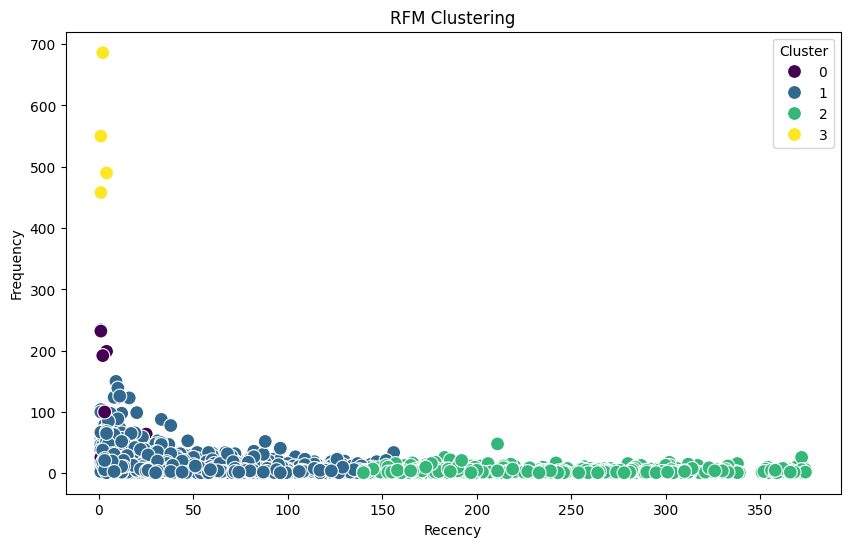

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=rfm_data, palette='viridis', s=100)
plt.title('RFM Clustering')
plt.show()

In order to better understand each cluster's charecteristics We group the data based on the cluster and apply the aggregate function.

In [ ]:
cluster_analysis = rfm_data.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':'mean'
}).sort_values(by='Cluster')

In [ ]:
cluster_analysis

,Recency,Frequency,Monetary
Cluster,,,
0,6.200000,103.900000,10997.454000
1,43.197851,11.116339,209.169093
2,246.245668,3.530071,69.265362
3,2.000000,546.000000,6774.505000


In [ ]:
cluster_analysis['Count'] = rfm_data.groupby('Cluster').size()

In [ ]:
cluster_analysis

,Recency,Frequency,Monetary,Count
Cluster,,,,
0,6.200000,103.900000,10997.454000,10
1,43.197851,11.116339,209.169093,2699
2,246.245668,3.530071,69.265362,981
3,2.000000,546.000000,6774.505000,4


**Cluster 0**: This cluster represents high value customers, On average they have purchased recently (6 days ago). Their purchasing frequency is high and this cluster has the highest spending.

**Cluster 1**: This cluster forms the major chunk of our customer base. They are regular customers with moderate frequency and spending.

**Cluster 2**: These are customers who haven't purchased recently, Have very low frequency and spending. This cluster represents a group of less active or low value customers.

**Cluster 3**: This cluster represents a unique group of customers who have purchased recently (2 days ago) and have very high frequency and high spending.




**Marketing Strategy Suggestions:**

**High Value Customers (Cluster 0):**

**Objective**: Retain and maximize value from this segment.

**Strategy:**

*   Offer exclusive loyalty programs or VIP benefits to encourage continued high spending.
*   Run targeted promotions to showcase premium products or services.
*   Provide personalized recommendations based on their previous high-value purchases.
*   Solicit feedback and preferences to enhance the customer experience.

**Regular Customers (Cluster 1):**

**Objective:** Encourage frequent and consistent engagement.

**Strategy:**

*   Implement a tiered loyalty program to reward frequent purchases. The tiered structure encourages customers to increase their engagement, spending, and frequency of interactions with the brand to unlock additional perks.
*   Send personalized offers based on their historical preferences.
*   Engage them through targeted email campaigns with relevant content.
*   Introduce limited-time promotions to drive more frequent transactions.

**Inactive/Low-Value Customers (Cluster 2):**

**Objective:** Reactivate and increase engagement.

**Strategy:**

*   Launch win-back campaigns with special incentives or discounts.
*   Highlight new products or features to rekindle interest.
*   Targeted advertising to bring them back to our platform.

**Unique High-Value Group (Cluster 3):**

**Objective:** Maintain and enhance their loyalty.

**Strategy**:

*   Acknowledge their high engagement with personalized thank-you messages.
*   Provide early access to new products or services.
*   Offer exclusive promotions to express appreciation for their loyalty.



We can also implement a referral program for our high value as well as our regular customers but we need to tailor the incentives we offer to each customer segment.

For High value customers, We may offer exclusive or high value rewards while regular customers may respond well to immediate discounts or entry into a loyalty program.

Once implemented, We need to track the success of the referral program within each customer segment. Analyze the data to understand which incentives are most effective for different groups.


















In [ ]:
data_negquantity = data[data['Quantity']<0]

In [ ]:
data_negquantity = data_negquantity.dropna(subset=['CustomerID'])

In [ ]:
data_negquantity['CustomerID'] = data_negquantity['CustomerID'].astype(int)

In [ ]:
data_negquantity.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
59,C564945,20685,DOORMAT RED RETROSPOT,-10,2011-08-31 13:26:00,6.75,16652,United Kingdom
77,C565050,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,-2,2011-08-31 17:10:00,4.95,12381,Norway
241,C539258,21258,VICTORIAN SEWING BOX LARGE,-2,2010-12-16 14:30:00,10.95,16233,United Kingdom
272,C560540,23291,DOLLY GIRL CHILDRENS CUP,-1,2011-07-19 12:26:00,1.25,12415,Australia
320,C568370,90162B,ANT SILVER LIME GREEN BOUDICCA RING,-1,2011-09-26 16:43:00,2.95,15154,United Kingdom


In [ ]:
data_negquantity = data_negquantity.set_index('CustomerID')

In [ ]:
merged_data = rfm_data.merge(data_negquantity, left_index=True, right_index=True)

In [ ]:
merged_data

,Recency,Frequency,Monetary,Cluster,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,,,,,,,,,,,
12352,36,9,174.53,1,C547388,37448,CERAMIC CAKE DESIGN SPOTTED MUG,-12,2011-03-22 16:07:00,1.49,Norway
12381,33,8,140.17,1,C565050,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,-2,2011-08-31 17:10:00,4.95,Norway
12406,22,7,246.07,1,C562728,22849,BREAD BIN DINER STYLE MINT,-1,2011-08-09 09:41:00,14.95,Denmark
12413,67,5,105.30,1,C540367,POST,POSTAGE,-3,2011-01-06 16:17:00,18.00,France
12415,25,64,11189.97,0,C560540,23291,DOLLY GIRL CHILDRENS CUP,-1,2011-07-19 12:26:00,1.25,Australia
...,...,...,...,...,...,...,...,...,...,...,...
18225,3,24,409.34,1,C547992,22891,TEA FOR ONE POLKADOT,-3,2011-03-29 09:58:00,4.25,United Kingdom
18250,310,3,33.92,2,C543750,22845,VINTAGE CREAM CAT FOOD CONTAINER,-1,2011-02-11 13:59:00,6.35,United Kingdom
18257,39,13,253.49,1,C555268,22980,PANTRY SCRUBBING BRUSH,-5,2011-06-01 16:17:00,1.65,United Kingdom


In [ ]:
merged_data['Returns_Value'] = abs(merged_data['Quantity']*merged_data['UnitPrice'])

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 12352 to 18270
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Recency        805 non-null    int64         
 1   Frequency      805 non-null    int64         
 2   Monetary       805 non-null    float64       
 3   Cluster        805 non-null    int32         
 4   InvoiceNo      805 non-null    object        
 5   StockCode      805 non-null    object        
 6   Description    805 non-null    object        
 7   Quantity       805 non-null    int64         
 8   InvoiceDate    805 non-null    datetime64[ns]
 9   UnitPrice      805 non-null    float64       
 10  Country        805 non-null    object        
 11  Returns_Value  805 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(3), object(4)
memory usage: 78.6+ KB


In [ ]:
avg_returns = merged_data.groupby('Cluster').agg({'Returns_Value':'mean'})

In [ ]:
avg_returns['Count'] = merged_data.groupby('Cluster').size()

In [ ]:
avg_returns

,Returns_Value,Count
Cluster,,
0,94.176111,36
1,23.734576,649
2,17.606000,75
3,28.850667,45


Looking at the value and the volume of returns for each customer segment, we can derive the following insights.

Cluster 0: Although this cluster has a smaller count of returns compared to others, the average returns value is high as they are high-value customers, so they tend to make significant-value returns. Despite the lower count, the impact of returns from this cluster can be substantial.

Cluster 1: This cluster which represents a significant portion of the customer base has moderate average returns value and higher count of returns. Strategies to manage and reduce returns may be important for this group.

Cluster 2: This cluster which represents inactive/low value customers have a lower average returns value but moderate returns count. Understanding the reasons behind returns from this group may be beneficial for improving customer satisfaction.

Cluster 3: This group with very high frequency and spending also has a relatively high average returns value. Managing returns from this cluster, which represents high-value and active customers, could be a key focus.


In general, focussing on the reason behind the returns is important as rectifying any mistakes on our part such as selling a defective product or product's description not matching with the actual product can not only improve our revenue but it will improve customer satisfaction and confidence in our products.